In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MNISTTraining"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)



In [14]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(mnist["data"], mnist["target"],test_size=0.2, random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_, y_train_,test_size=0.25, random_state=42)
print(len(X_train),len(y_valid),len(y_test))
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train,y_train )

42000 14000 14000


RandomForestClassifier(random_state=42)

In [8]:
#feature의 중요도
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


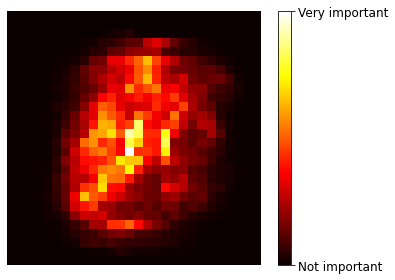

In [9]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

In [16]:
#defalut
rnd_clf.score(X_valid,y_valid)

0.9652857142857143

In [17]:
from sklearn.model_selection import GridSearchCV
rnd1_clf = RandomForestClassifier( random_state=42)
param_grid = [
   
    {'n_estimators':[100,150,200,250],'max_depth': [10,15,20,30,40], 'max_leaf_nodes': [3,5,7,9,11]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 15, 20, 30, 40],
                          'max_leaf_nodes': [3, 5, 7, 9, 11],
                          'n_estimators': [100, 150, 200, 250]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=11, n_estimators=250,
                       random_state=42)

In [19]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100,150],'max_depth': [10,15], 'max_leaf_nodes': [11,13]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 15], 'max_leaf_nodes': [11, 13],
                          'n_estimators': [100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [20]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=13, n_estimators=150,
                       random_state=42)

In [21]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [7,10], 'max_leaf_nodes': [13,15,17]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [7, 10], 'max_leaf_nodes': [13, 15, 17],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=17, random_state=42)

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=10, max_leaf_nodes=17, random_state=42)
rnd_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, max_leaf_nodes=17, random_state=42)

In [27]:
rnd_clf.score(X_valid,y_valid)

0.8192857142857143

In [29]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [15,20], 'max_leaf_nodes': [20,25]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [15, 20], 'max_leaf_nodes': [20, 25],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_leaf_nodes=25, random_state=42)

In [31]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=15, max_leaf_nodes=25, random_state=42)
rnd_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=15, max_leaf_nodes=25, random_state=42)

In [32]:
rnd_clf.score(X_valid,y_valid)

0.845

In [33]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [14,15,16,17], 'max_leaf_nodes': [25,30,35]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [14, 15, 16, 17],
                          'max_leaf_nodes': [25, 30, 35],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=14, max_leaf_nodes=35, random_state=42)

In [35]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=14, max_leaf_nodes=35, random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, max_leaf_nodes=35, random_state=42)

In [36]:
rnd_clf.score(X_valid,y_valid)

0.8646428571428572

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=200,max_depth=14, max_leaf_nodes=35, random_state=42)
rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_valid,y_valid)

0.8668571428571429

In [38]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [12,13,14], 'max_leaf_nodes': [35,45,55]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [12, 13, 14],
                          'max_leaf_nodes': [35, 45, 55],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, max_leaf_nodes=55, random_state=42)

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=12, max_leaf_nodes=35, random_state=42)
rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_valid,y_valid)

0.8646428571428572

In [41]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [11,12], 'max_leaf_nodes': [60,70]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [11, 12], 'max_leaf_nodes': [60, 70],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, max_leaf_nodes=70, random_state=42)

In [43]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=11, max_leaf_nodes=70, random_state=42)
rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_valid,y_valid)

0.8945714285714286

In [44]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [10,11,12], 'max_leaf_nodes': [20,30]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 11, 12], 'max_leaf_nodes': [20, 30],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=30, random_state=42)

In [55]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=10, max_leaf_nodes=150, random_state=42)
rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_valid,y_valid)

0.9198571428571428

In [56]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[100],'max_depth': [10,11], 'max_leaf_nodes': [150,250,350]}
  ]
grid_search = GridSearchCV(rnd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [10, 11],
                          'max_leaf_nodes': [150, 250, 350],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, max_leaf_nodes=350, random_state=42)

In [61]:

1
rnd_clf = RandomForestClassifier(n_estimators=200,max_depth=11, max_leaf_nodes=300, random_state=42)
2
rnd_clf.fit(X_train,y_train)
3
rnd_clf.score(X_valid,y_valid)

0.9389285714285714